In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Concrete Compressive Strength.csv')

In [3]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
newColNames = ['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate',
               'Fine Aggregate', 'Age','Concrete compressive strength']

In [6]:
df.columns = newColNames

In [7]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [8]:
df.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [9]:
df.shape

(1030, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
# Checking for null values
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

<AxesSubplot:>

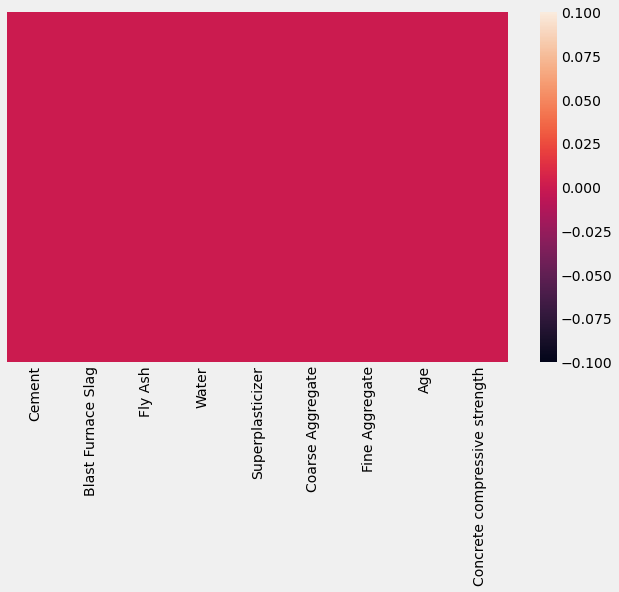

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False)

### No null values present in the dataset & all are numerical features

In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## Correlation among features

<AxesSubplot:>

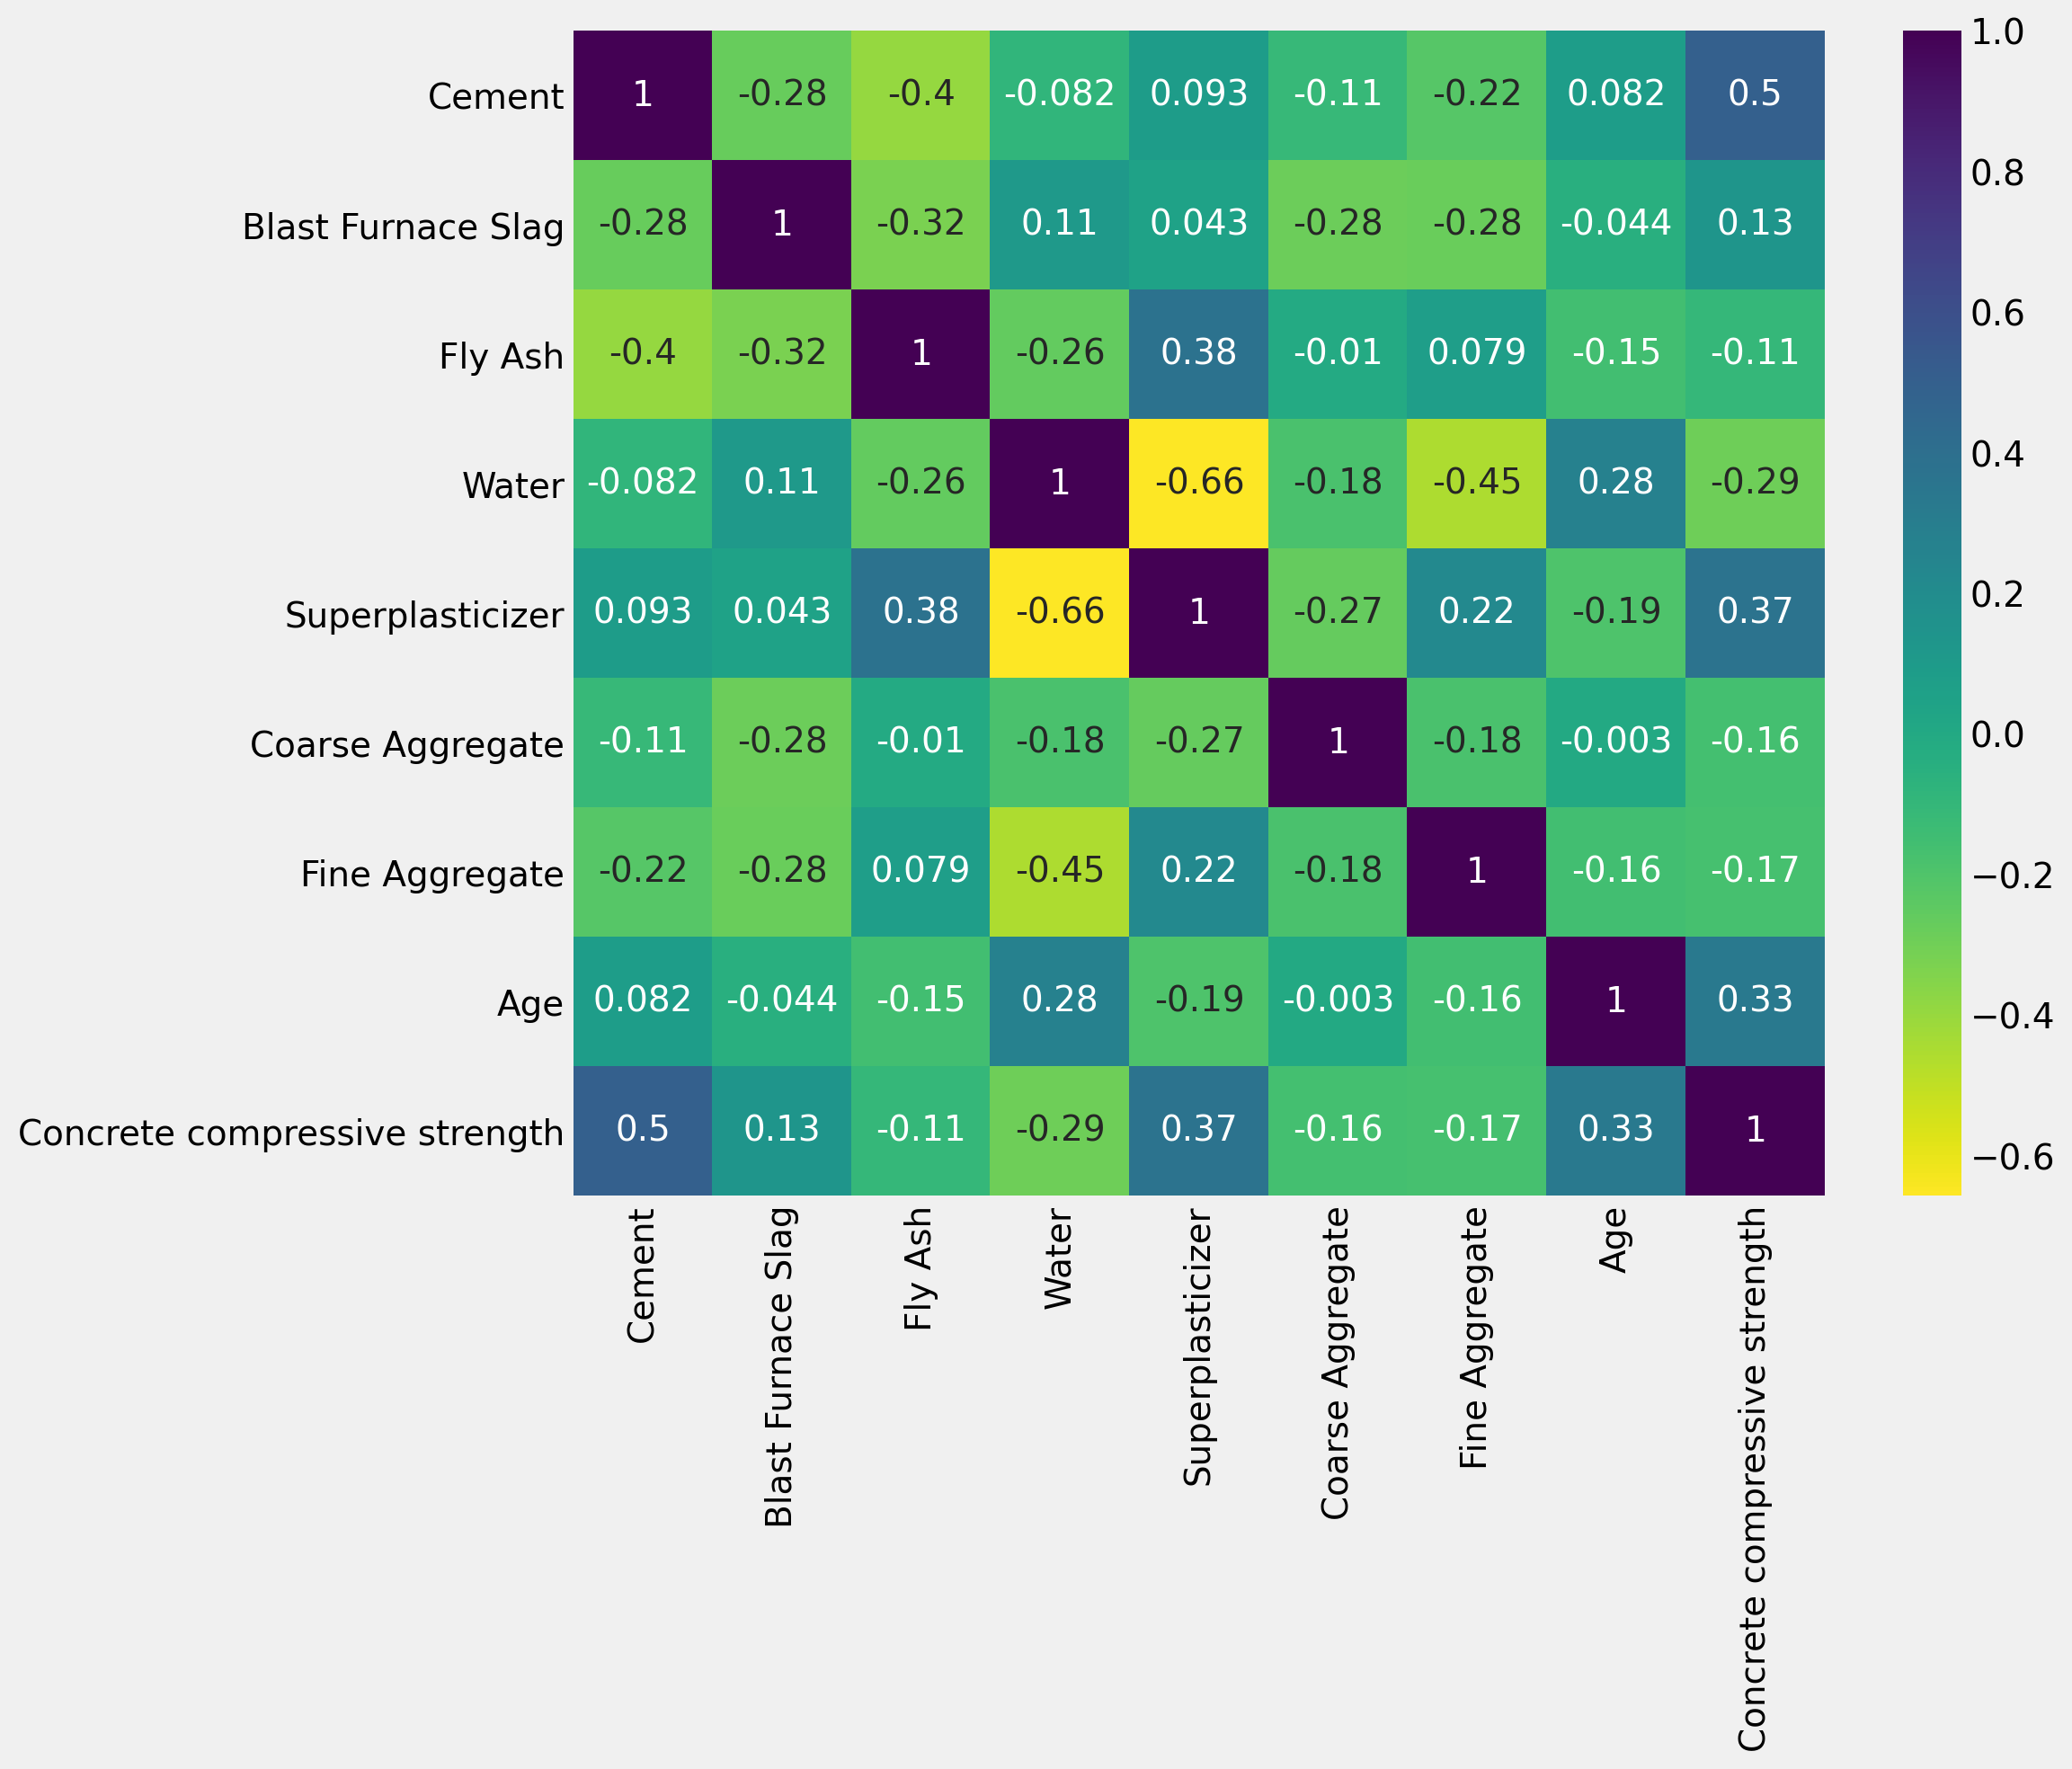

In [14]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.corr(), annot=True,cmap='viridis_r')

In [15]:
df.corr()['Concrete compressive strength'].sort_values(ascending=False)

Concrete compressive strength    1.000000
Cement                           0.497833
Superplasticizer                 0.366102
Age                              0.328877
Blast Furnace Slag               0.134824
Fly Ash                         -0.105753
Coarse Aggregate                -0.164928
Fine Aggregate                  -0.167249
Water                           -0.289613
Name: Concrete compressive strength, dtype: float64

## Univariate Analysis

<Figure size 3000x1600 with 0 Axes>

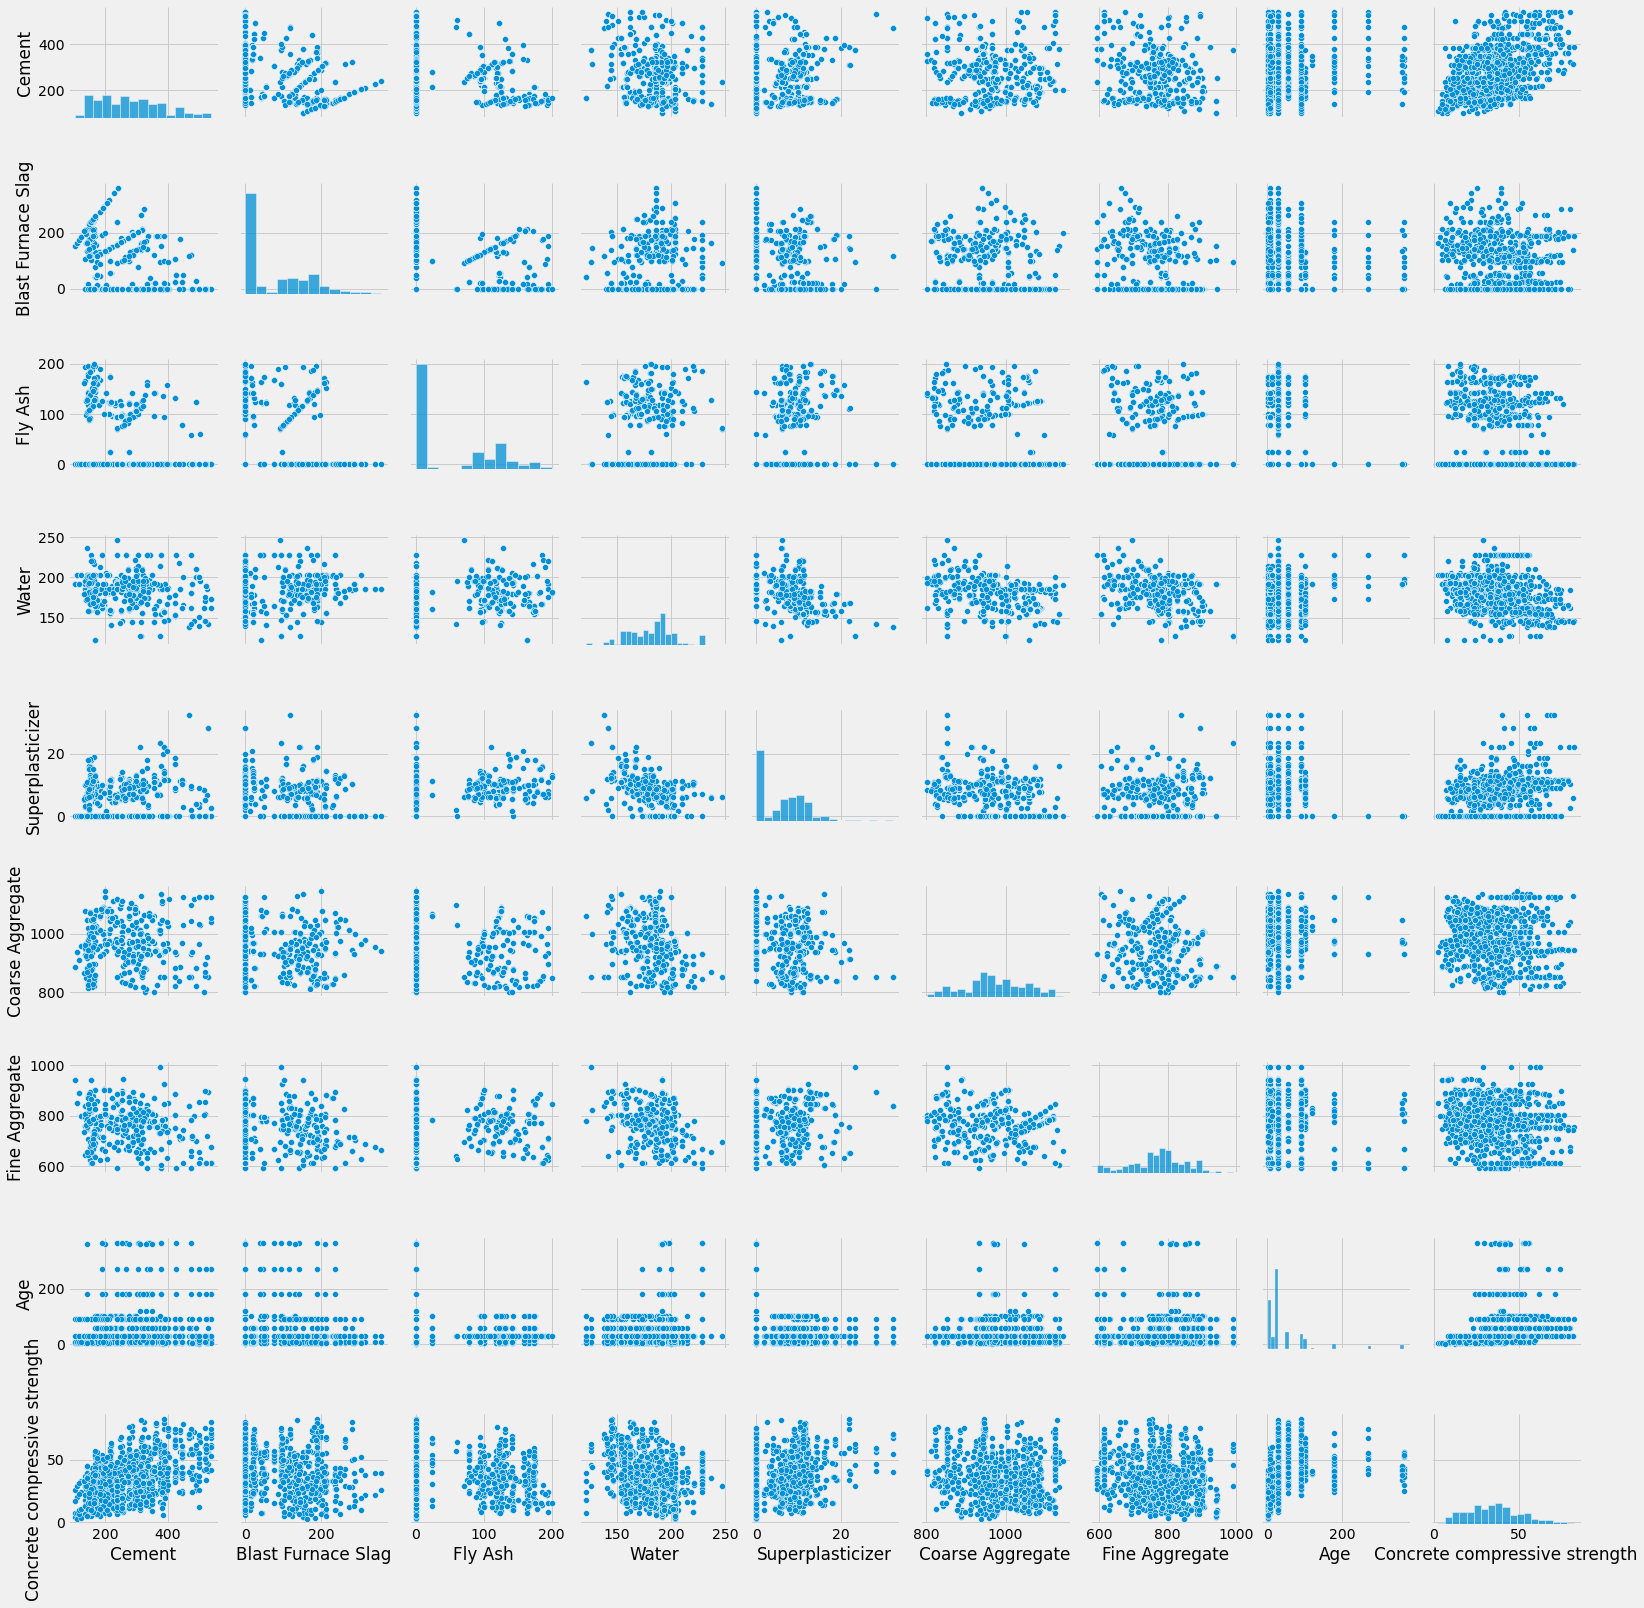

In [16]:
plt.figure(figsize=(15,8), dpi=200)
sns.pairplot(df)

In [17]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

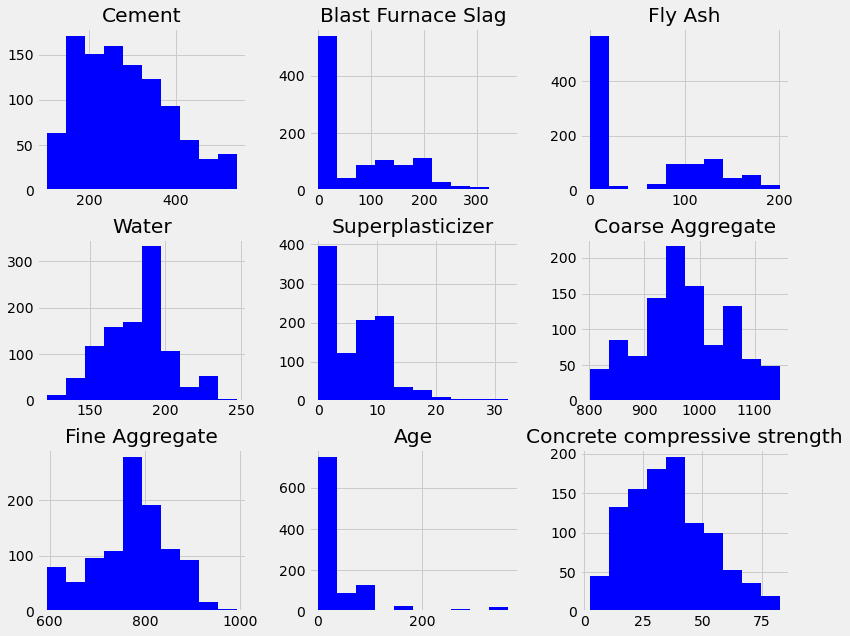

In [18]:
plt.figure(dpi=200)
df.hist(figsize=(12,10),color='blue')
plt.show()

In [19]:
def distributionPlot(var):
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 2, 1)
    sns.distplot(df[var], color='red')

    plt.subplot(1, 2, 2)
    sns.distplot(np.log1p(df[var]), color='blue')
    plt.xlabel('log(1+x) transformed')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


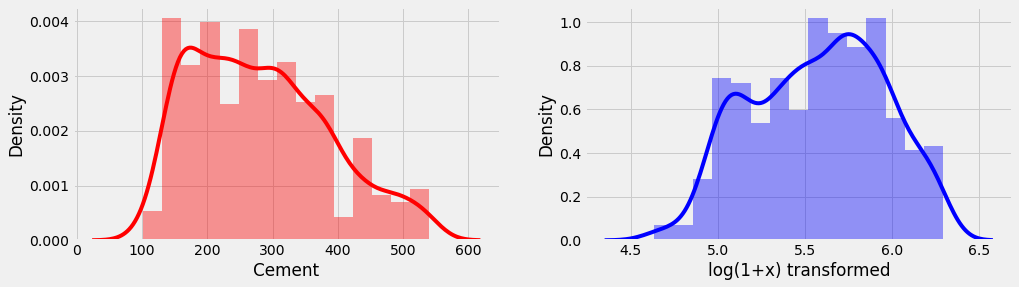

In [20]:
distributionPlot('Cement')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


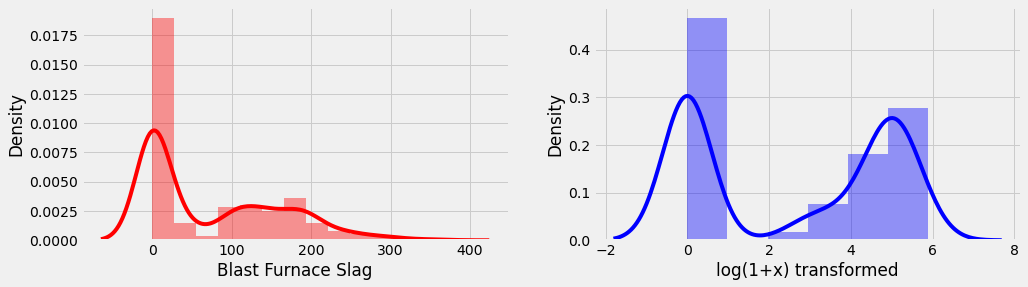

In [21]:
distributionPlot('Blast Furnace Slag')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


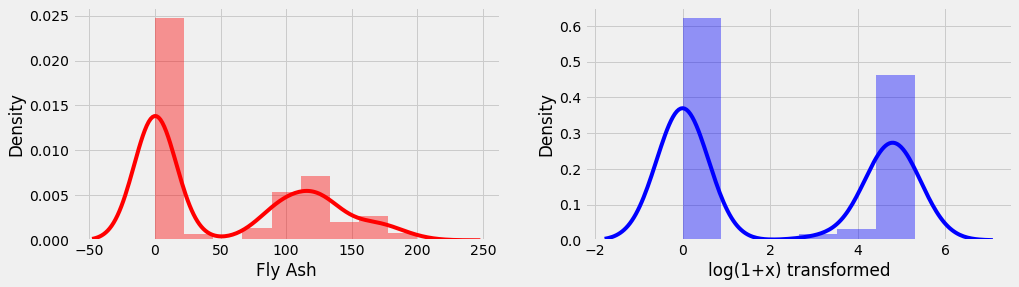

In [22]:
distributionPlot("Fly Ash")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


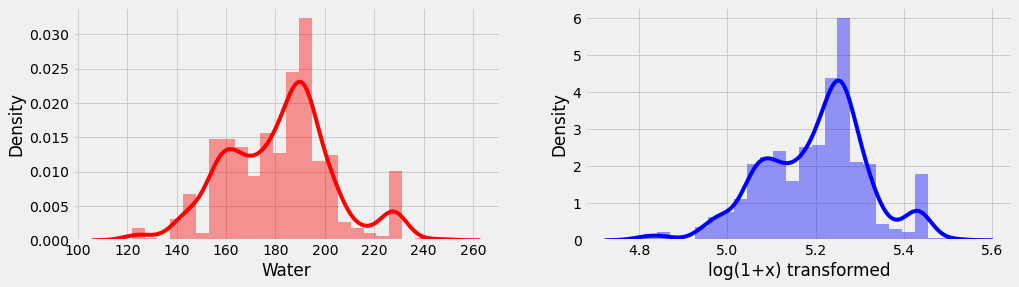

In [23]:
distributionPlot("Water")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


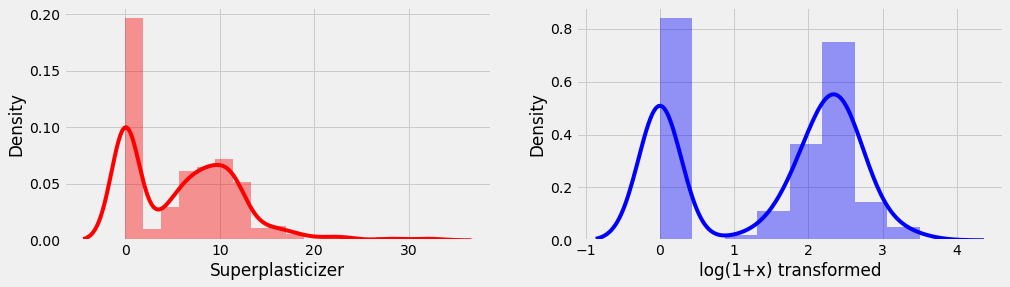

In [24]:
distributionPlot("Superplasticizer")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


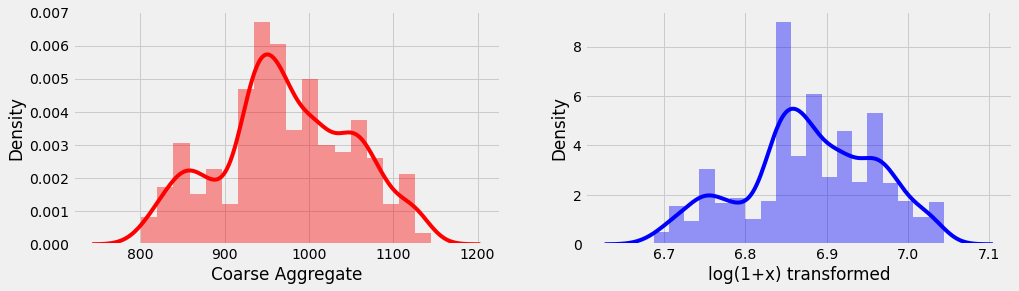

In [25]:
distributionPlot("Coarse Aggregate")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


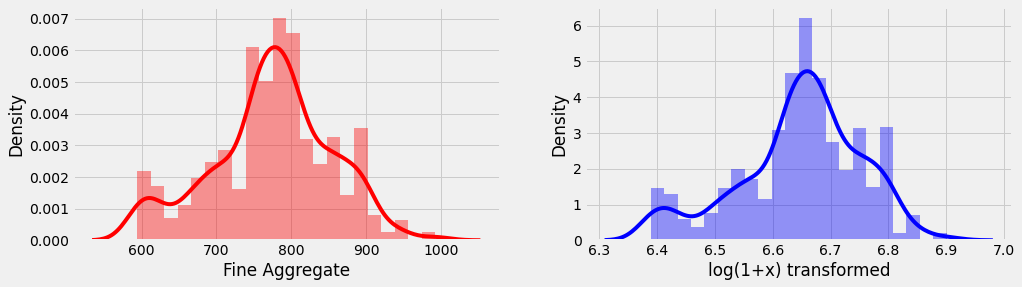

In [26]:
distributionPlot("Fine Aggregate")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


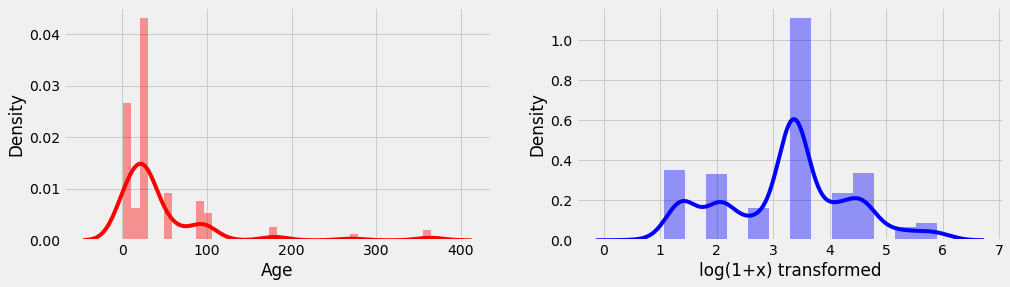

In [27]:
distributionPlot('Age')

### Conclusion:-
#### Features to be transformed with log(1+x)
##### Cement, Blast Furnace Slag, Superplasticizer, Age - Gives better normal distribution with transformation
##### Fly Ash, Water, Coarse Aggregate, Fine Aggregate - Not much difference with transformation

##  Checking for Outliers

<AxesSubplot:>

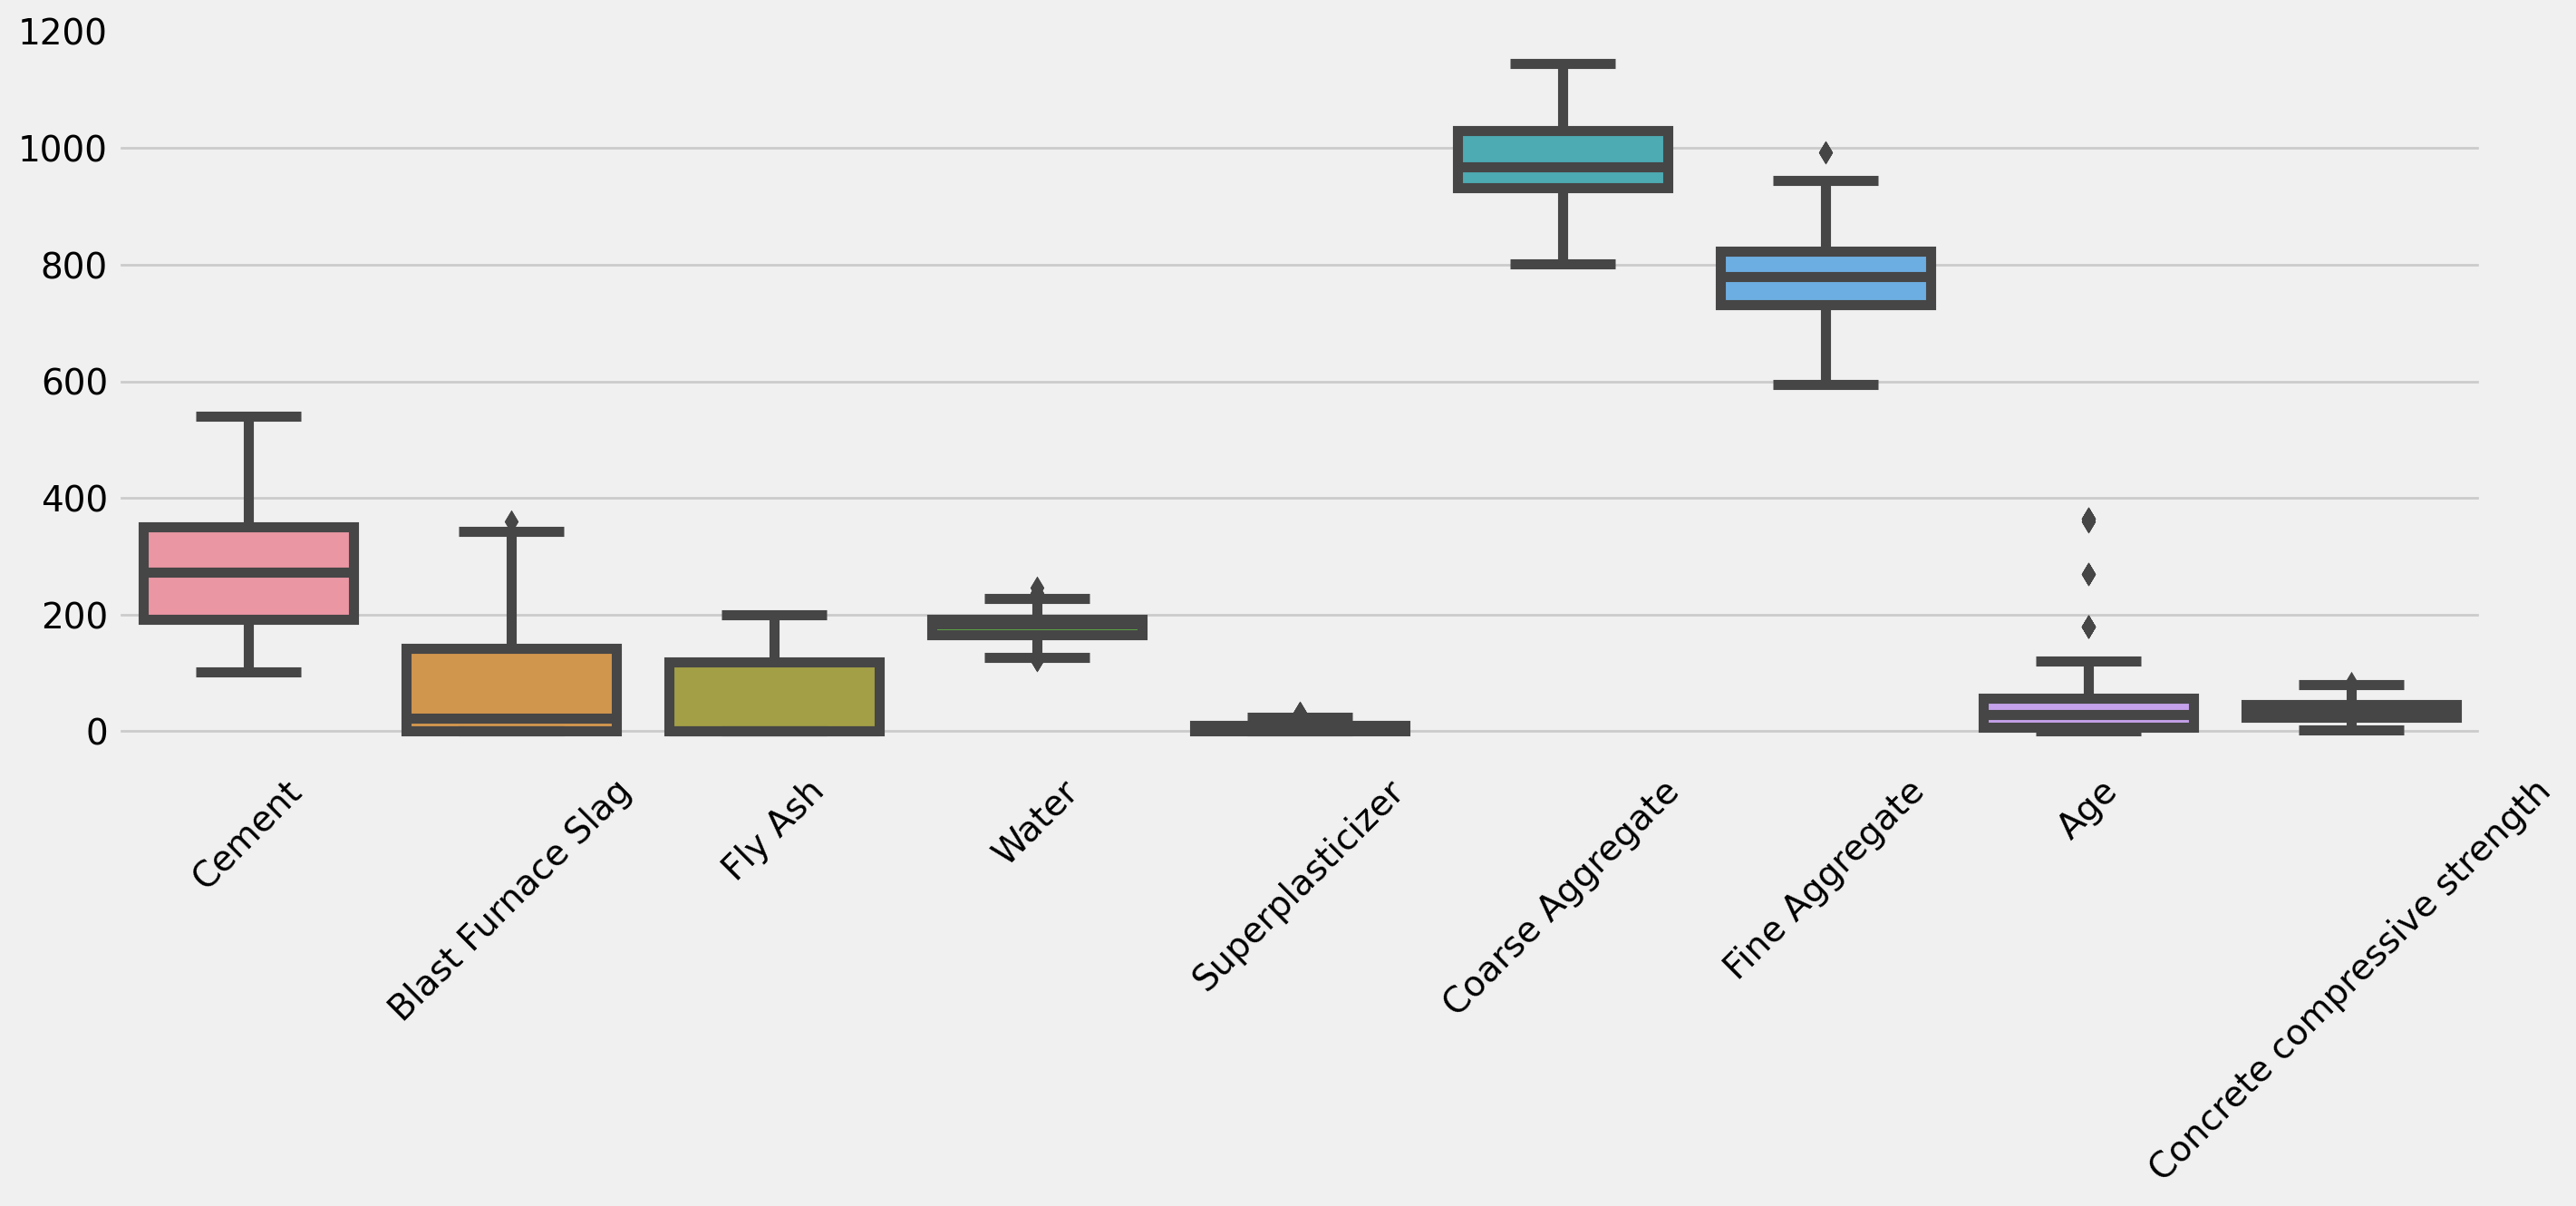

In [28]:
plt.figure(figsize=(15,5), dpi=200)
plt.xticks(rotation=45)
sns.boxplot(data=df)

#### Age has some outliers which will be not be removed as it might result in data loss

## Bivariate Analysis

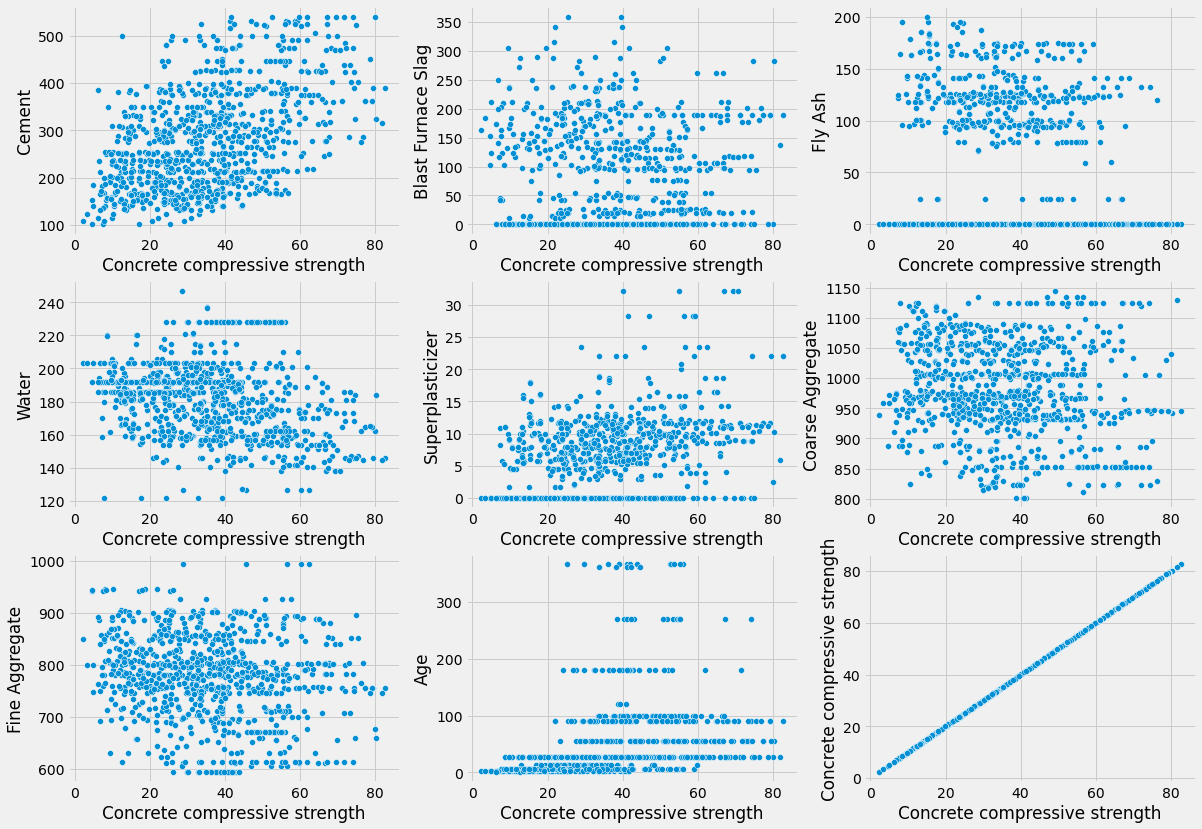

In [29]:
i=1
plt.figure(figsize = (18,18))
for col in df.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(data=df,x='Concrete compressive strength',y=col)
    i+=1

#### Concrete Compressive strength is positively correlated with Cement

In [30]:
cor = df.corr()['Concrete compressive strength'].sort_values()
cor

Water                           -0.289613
Fine Aggregate                  -0.167249
Coarse Aggregate                -0.164928
Fly Ash                         -0.105753
Blast Furnace Slag               0.134824
Age                              0.328877
Superplasticizer                 0.366102
Cement                           0.497833
Concrete compressive strength    1.000000
Name: Concrete compressive strength, dtype: float64

<AxesSubplot:>

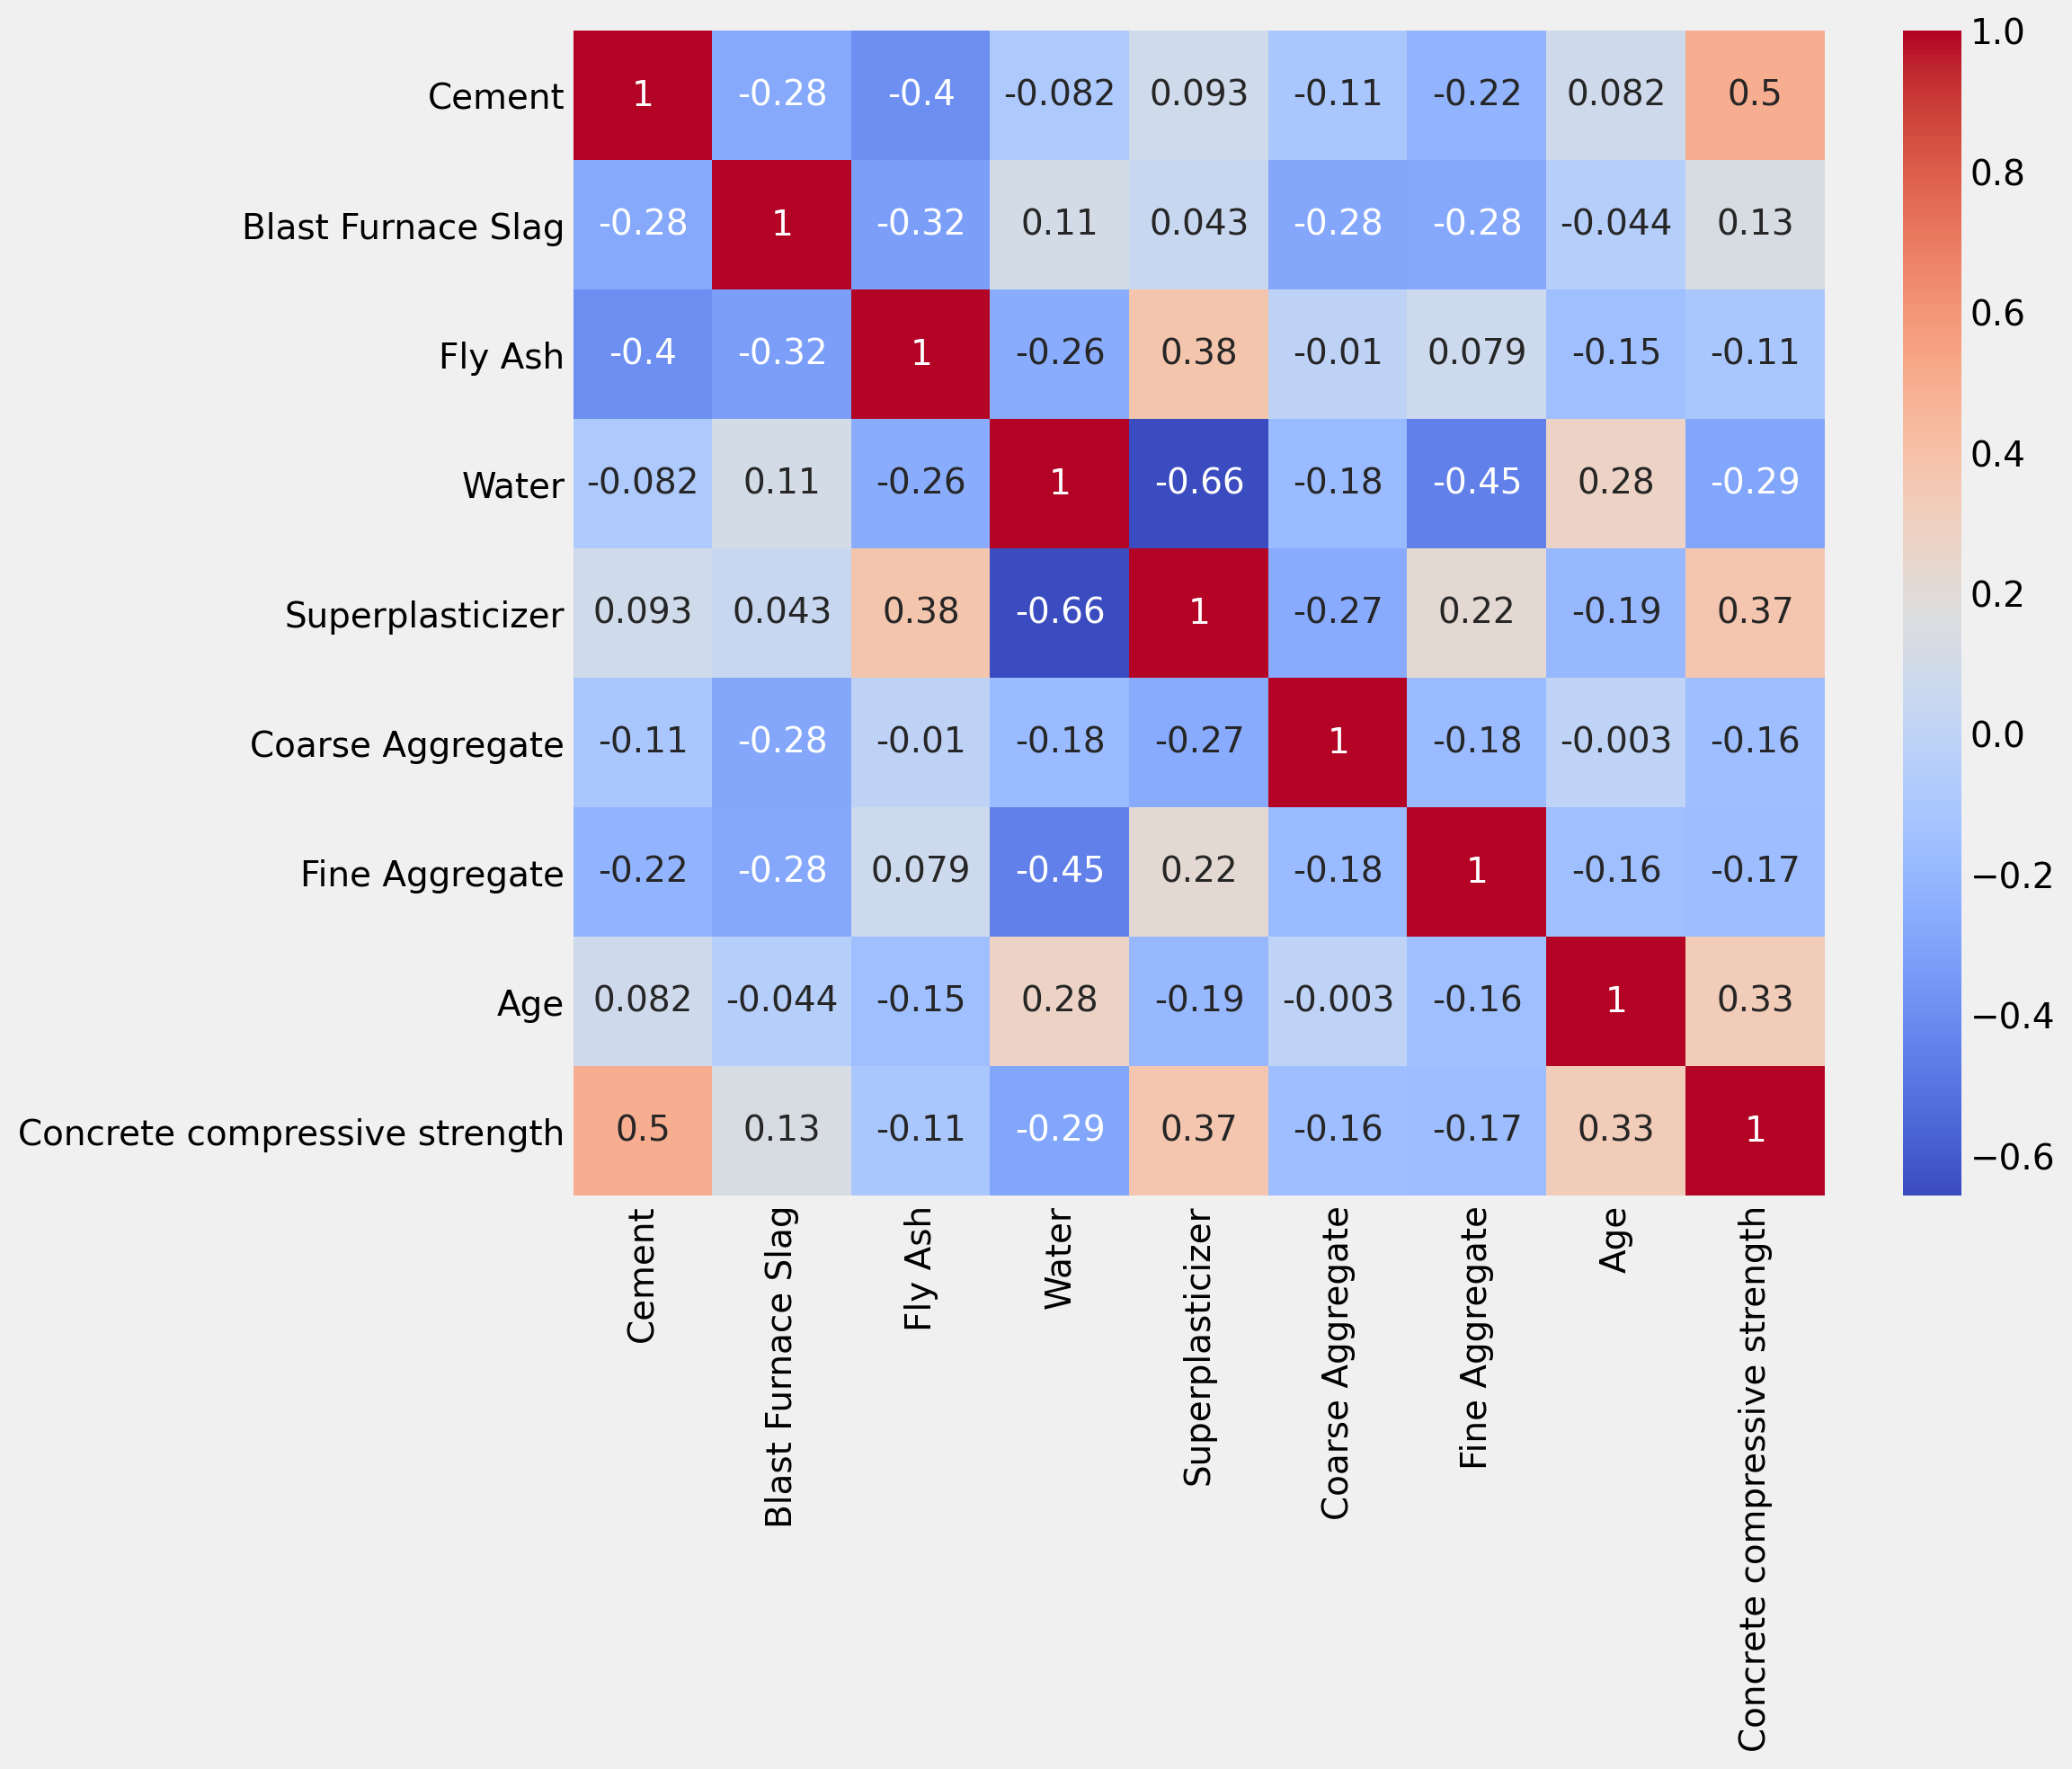

In [31]:
plt.figure(figsize=(10,8),dpi=200)
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

<AxesSubplot:>

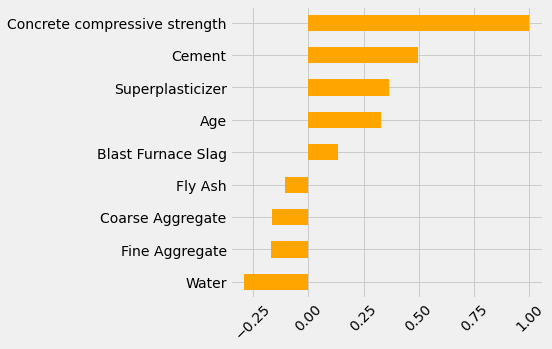

In [32]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
cor.plot(kind='barh',color='orange')

#### Cement, Superplasticizer, Age and Blast Furnace Slag are positively correlated, while Water, Fine Aggregate, Coarse Aggregate and Fly Ash are negatively correlated with Compressive strength.

### Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

In [34]:
X=df.drop(columns='Concrete compressive strength')
Y=df[['Concrete compressive strength']]

In [35]:
X.shape, Y.shape

((1030, 8), (1030, 1))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824, 1), (206, 1))

In [38]:
X_train.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7,28


In [39]:
## Log transforming Cement, Blast Furnace Slag, Superplasticizer, Age

In [40]:
# trf1 = ColumnTransformer([
#     ('Log(n+1) Transformer', FunctionTransformer(np.log1p),[0,1,4,7])
# ], remainder='passthrough')

Log Transforming is degrading the score of the model. Hence it is not done.

In [41]:
## Transforming the Age feature with KBinsdiscretizer and Columntransformer

In [42]:
# trf2 = ColumnTransformer([
#         ('KBinsDiscretizer', KBinsDiscretizer(),[7])
# ],remainder='passthrough')

In [43]:
## Applying scaling

In [44]:
trf3 = ColumnTransformer([
    ('Scaler', StandardScaler(),[0,1,2,3,4,5,6,7])
])

In [45]:
## Pipeline Creation

In [46]:
pipe = Pipeline([
#     ('trf1', trf1),
    #('trf2', trf2), # Not using as performance is falling - Outlier
    ('trf3', trf3)
])

In [47]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf3',
                 ColumnTransformer(transformers=[('Scaler', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])]))])

In [48]:
X_train_transformed = pipe.transform(X_train)

In [49]:
X_test_transformed = pipe.transform(X_test)

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lreg = LinearRegression()
lreg.fit(X_train_transformed, y_train)

LinearRegression()

In [52]:
pred = lreg.predict(X_test_transformed)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
mse = mean_squared_error(y_test,pred)
mse

95.97548435337706

In [55]:
rmse = np.sqrt(mse)
rmse

9.796707832398447

In [56]:
r2_score(y_test,pred)

0.6275416055429021

### DecisionTree

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train_transformed, y_train)
dtr.score(X_test_transformed, y_test)

0.8175434648935107

### SVR

In [59]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(X_train_transformed, y_train)

mse = mean_squared_error(y_train, svr.predict(X_train_transformed))
rmse = np.sqrt(mse)
rmse

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


10.926997712266246

In [60]:
svr.score(X_test_transformed, y_test)

0.5618031768321502

### RandomForest

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=100, n_jobs=-1)
rf.fit(X_train_transformed, y_train)

mse = mean_squared_error(y_train, rf.predict(X_train_transformed))
rmse = np.sqrt(mse)
rmse

<ipython-input-61-7f9af3d698c4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_transformed, y_train)


11.395060077169298

In [62]:
rf.score(X_test_transformed, y_test)

0.44848861569913323

#### Alternative technique for model selection

In [63]:
from sklearn.linear_model import SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [64]:
lr=LinearRegression()
sgd=SGDRegressor()
lasso=Lasso()
ridge=Ridge()
svr = LinearSVR()
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
gboost=GradientBoostingRegressor()
adboost=AdaBoostRegressor()
knn=KNeighborsRegressor()

In [65]:
algo=[lr,sgd,lasso,ridge,svr,rf,dt,gboost,adboost,knn]

In [66]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(X_train_transformed, y_train)
    accuracy_train.append(algo[i].score(X_train_transformed, y_train))
    accuracy_test.append(algo[i].score(X_test_transformed, y_test))
    model.append(algo[i])
    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-66-7a483e16c045>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  algo[i].fit(X_train_transformed, y_train)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs

In [67]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

,model,score_train,score_test
0,LinearRegression(),0.610459,0.627542
1,SGDRegressor(),0.608135,0.628305
2,Lasso(),0.5673,0.563889
3,Ridge(),0.610433,0.627564
4,LinearSVR(),0.579322,0.561738
5,"(DecisionTreeRegressor(max_features='auto', ra...",0.986167,0.882853
6,DecisionTreeRegressor(),0.997542,0.825813
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.949619,0.881909
8,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.830459,0.764617
9,KNeighborsRegressor(),0.827416,0.712356


### Decision Tree is selected

In [68]:
# Hyperparameter Tuning

grid_params = {
    'criterion' : [ 'mae' ,'mse', 'friedman_mse','poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10,12,],
    'min_samples_split' : [ 2, 3, 4, 5,7],
    'min_samples_leaf' : [ 2, 3, 4, 5,7]
}

grid_search = GridSearchCV(dt, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse', 'friedman_mse', 'poisson'],
                         'max_depth': [3, 5, 7, 9, 10, 12],
                         'min_samples_leaf': [2, 3, 4, 5, 7],
                         'min_samples_split': [2, 3, 4, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [69]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'best'}
0.8241288574515935


In [70]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 12, min_samples_leaf = 2, min_samples_split = 7, splitter = 'best')
dtr.fit(X_train_transformed, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=2, min_samples_split=7)

In [71]:
dtr.score(X_train_transformed, y_train)

0.9717819993762028

In [72]:
dtr.score(X_test_transformed, y_test)

0.8198102801813351